# LBPD Stop EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [3]:
file_path = '/Users/terencerustia/Documents/Data Science/Long Beach Policing Analysis/processed_data/'

In [4]:
race_df = pd.read_csv(file_path + 'PROCESSED_1_race.csv')
race_df.drop('ObjectId', axis=1, inplace=True)
race_df.rename(columns= lambda x: re.sub('perceivedRace_', '', x), inplace=True)

In [6]:
race_df.head(3)

,StopID,PID,Asian,Black,Hispanic,Middle Eastern or South Asian,Native American,Pacific Islander,White
0,5782,1,0,0,0,0,0,0,1
1,5785,1,0,0,0,0,0,0,1
2,5786,1,0,0,0,0,0,0,1


In [8]:
race_cols = race_df.drop(['StopID', 'PID'], axis=1).columns

### Aggregate number of police stops

In [9]:
print('The total number of LBPD police stops in 2019 is', len(race_df['StopID'].unique()))

The total number of LBPD police stops in 2019 is 36788


In [10]:
stop_sums = pd.DataFrame(race_df[race_cols].sum()).reset_index()
stop_sums.rename(columns={'index': 'race', 0: 'total_stops'}, inplace=True)

In [11]:
stop_sums

,race,total_stops
0,Asian,3150
1,Black,12472
2,Hispanic,16716
3,Middle Eastern or South Asian,1804
4,Native American,1301
5,Pacific Islander,1700
6,White,10972


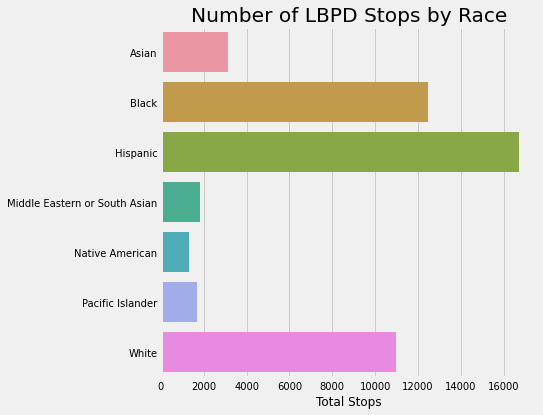

In [20]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x='total_stops', y='race', data=stop_sums)
g.set_ylabel('')
g.set_xlabel('Total Stops', fontsize=12)
g.set_title('Number of LBPD Stops by Race')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10);